In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv(r"C:\Users\manah\Downloads\monatszahlen2505_verkehrsunfaelle_06_06_25.csv")
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2025,202501,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2025,202502,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2025,202503,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2025,202504,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2025,202505,NaN,NaN,NaN,NaN,NaN


In [4]:
"""""
Understanding of the dataset
    MONATSZAHL: CATEGORY
    AUSPRAEGUNG:ACCIDENT TYPE
    JAHR: YEAR
    MONAT: MONTH
    WERT: VALUE
    VORJAHRESWERT: PREVIOUS YEAR COUNT
    VERAEND_VORMONAT_PROZENT: PERCENTAGE CHANGE COMPARED TO PREVIOUS MONTH
    VERAEND_VORJAHRESMONAT_PROZENT: PERCENTAGE CHANGE TO THE SAME MONTH IN PREVIOUS YEAR
    ZWOELF_MONATE_MITTELWERT: AVERAGE OVER 12 MONTHS
    """

'""\nUnderstanding of the dataset\n    MONATSZAHL: CATEGORY\n    AUSPRAEGUNG:ACCIDENT TYPE\n    JAHR: YEAR\n    MONAT: MONTH\n    WERT: VALUE\n    VORJAHRESWERT: PREVIOUS YEAR COUNT\n    VERAEND_VORMONAT_PROZENT: PERCENTAGE CHANGE COMPARED TO PREVIOUS MONTH\n    VERAEND_VORJAHRESMONAT_PROZENT: PERCENTAGE CHANGE TO THE SAME MONTH IN PREVIOUS YEAR\n    ZWOELF_MONATE_MITTELWERT: AVERAGE OVER 12 MONTHS\n    '

In [5]:
df.dropna(axis=1, how='all', inplace=True)
print(df.columns)

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')


In [6]:
df = df[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]

In [7]:
#Filtering dataset for enteries above 2020
df_cleaned = df[df['JAHR']<=2020]
print(df_cleaned)

           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
63     Alkoholunfälle               insgesamt  2020   Summe  430.0
64     Alkoholunfälle               insgesamt  2020  202001   28.0
65     Alkoholunfälle               insgesamt  2020  202002   40.0
66     Alkoholunfälle               insgesamt  2020  202003   27.0
67     Alkoholunfälle               insgesamt  2020  202004   26.0
...               ...                     ...   ...     ...    ...
2340  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2341  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2342  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2343  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2344  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[1904 rows x 5 columns]


In [25]:
#For historical visualization
# Ensure MONAT is string type
df_cleaned['MONAT'] = df['MONAT'].astype(str)
# Remove rows where MONAT is 'Summe'
df_cleaned = df_cleaned[df_cleaned['MONAT'].str.lower() != 'summe']

# Keep only rows where MONAT is a 6-digit number (i.e., format YYYYMM)
#df_cleaned = df[df['MONAT'].str.match(r'^\d{6}$')]
df_cleaned['Datum'] = pd.to_datetime(df['MONAT'], format='%Y%m')


In [27]:
print(df_cleaned[['Datum']].head())
# Filter for 'insgesamt' only
df_cleaned = df[(df['AUSPRAEGUNG'] == 'insgesamt') & (df['Datum'] < '2021-01-01')].copy()
df_cleaned

       Datum
0 2025-01-01
1 2025-02-01
2 2025-03-01
3 2025-04-01
4 2025-05-01


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,Datum
64,Alkoholunfälle,insgesamt,2020,202001,28.0,2020-01-01
65,Alkoholunfälle,insgesamt,2020,202002,40.0,2020-02-01
66,Alkoholunfälle,insgesamt,2020,202003,27.0,2020-03-01
67,Alkoholunfälle,insgesamt,2020,202004,26.0,2020-04-01
68,Alkoholunfälle,insgesamt,2020,202005,40.0,2020-05-01
...,...,...,...,...,...,...
1670,Verkehrsunfälle,insgesamt,2000,200008,3387.0,2000-08-01
1671,Verkehrsunfälle,insgesamt,2000,200009,3807.0,2000-09-01
1672,Verkehrsunfälle,insgesamt,2000,200010,4117.0,2000-10-01
1673,Verkehrsunfälle,insgesamt,2000,200011,3931.0,2000-11-01


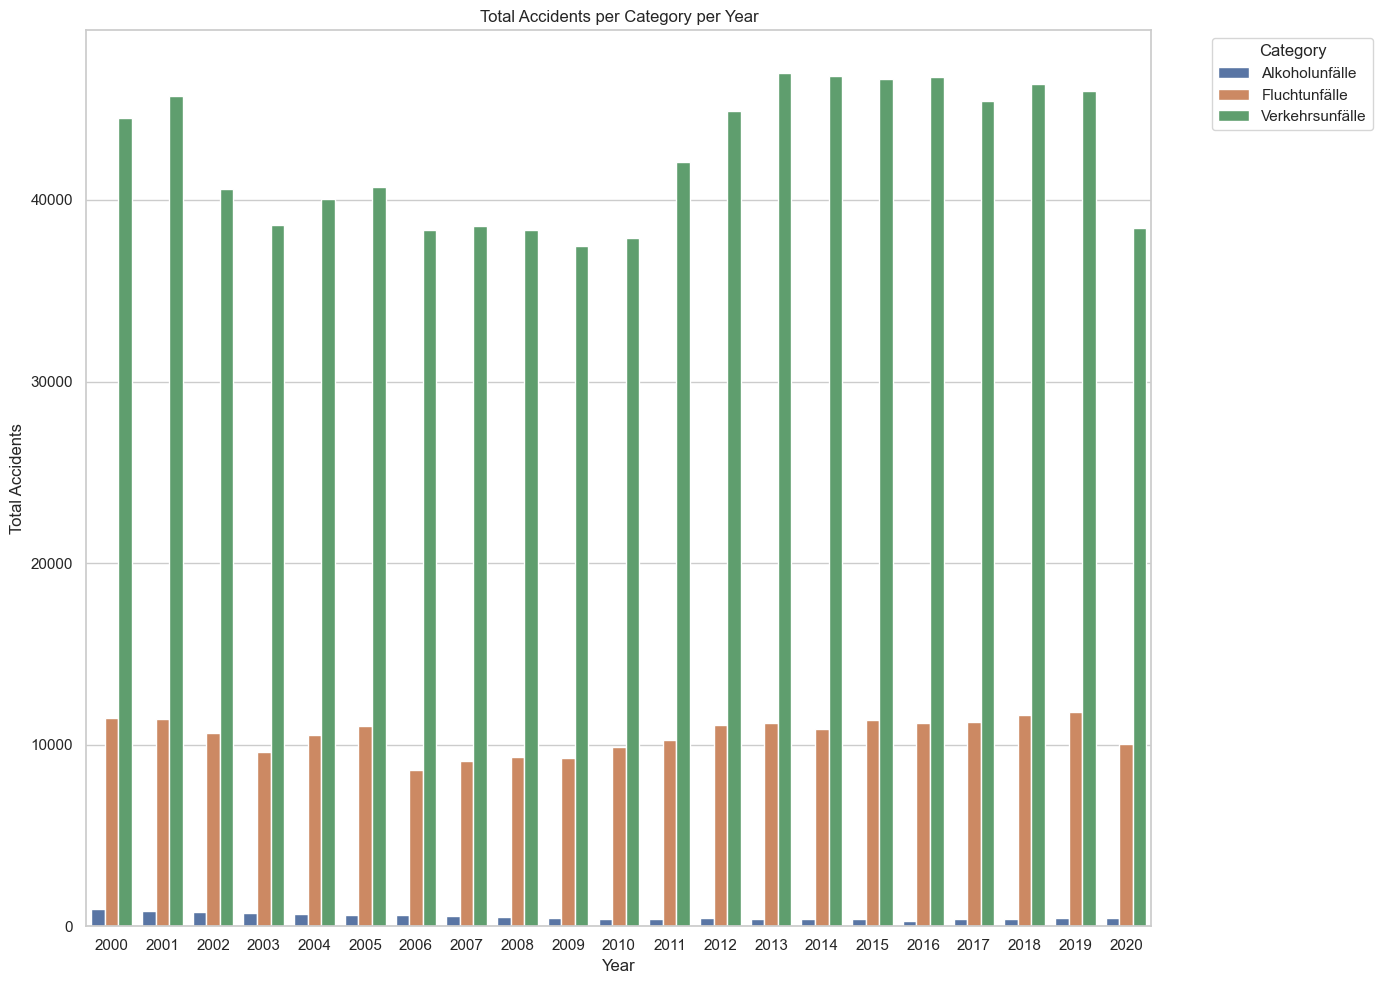

In [34]:
#Histogram showing the number of accidents per category
# Group and sum total accidents
df_grouped = df_cleaned.groupby(['MONATSZAHL', 'JAHR'])['WERT'].sum().reset_index()

plt.figure(figsize=(14,10))
sns.barplot(data=df_grouped, x='JAHR', y='WERT', hue='MONATSZAHL')

plt.title('Total Accidents per Category per Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#

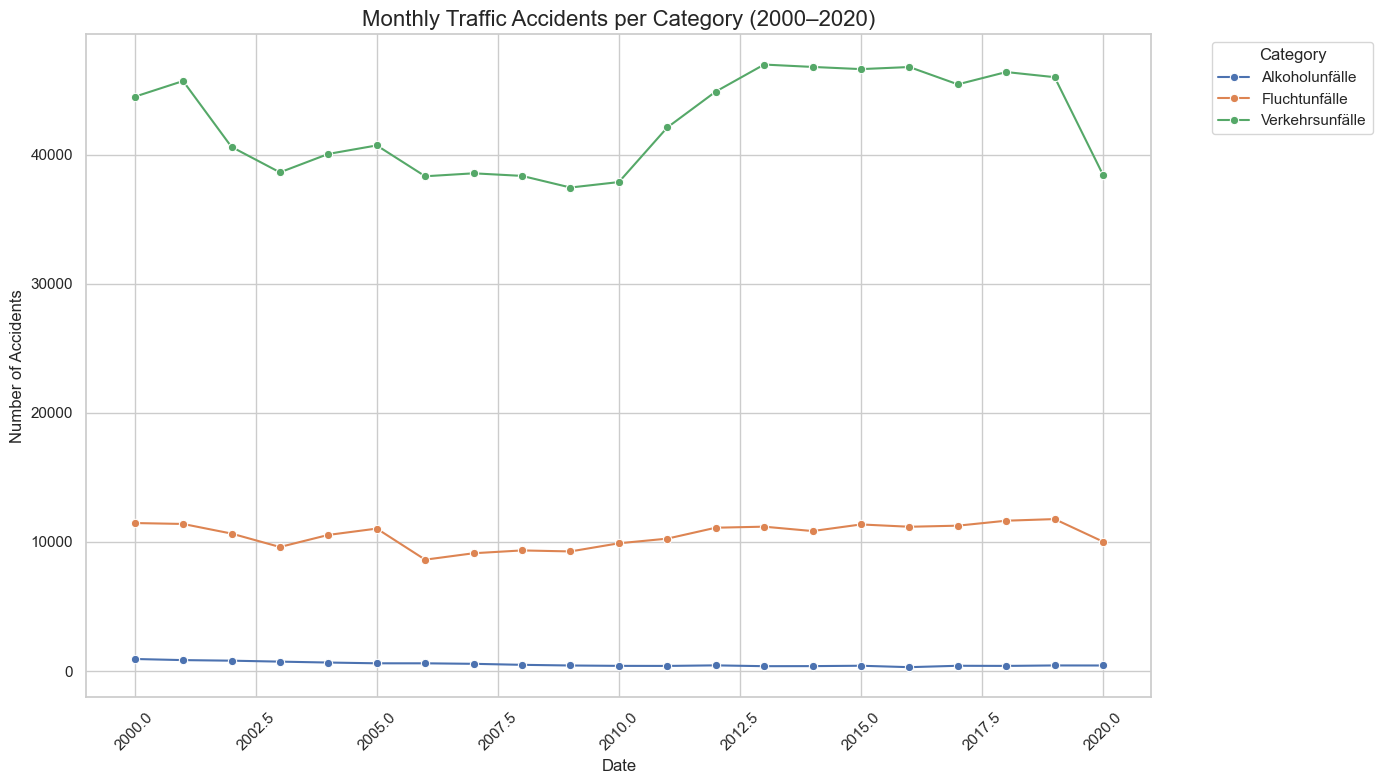

In [ ]:
# Create a figure
plt.figure(figsize=(14, 8))

# Plot lineplot of accidents over time per category
sns.lineplot(data=df_grouped, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')

# Plot decorations
plt.title('Monthly Traffic Accidents per Category (2000–2020)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

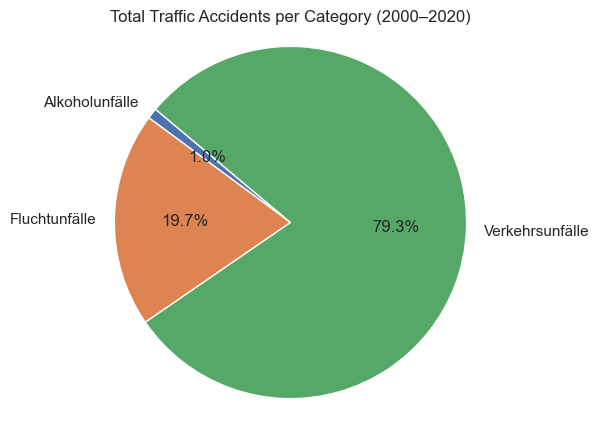

In [41]:
# Aggregate total accidents per category across all years
total_per_category = df_grouped.groupby('MONATSZAHL')['WERT'].sum()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(total_per_category, labels=total_per_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Traffic Accidents per Category (2000–2020)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()